In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("netflix.csv")

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
df.shape

(8807, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [342]:
(100.0*df.isna().sum()/df.shape[0]).round(2)

show_id           0.00
type              0.00
title             0.00
director         29.91
cast              9.37
country           9.44
date_added        0.00
release_year      0.00
rating            0.05
duration          0.03
listed_in         0.00
description       0.00
year_added        0.00
date_released     0.00
dtype: float64

In [46]:
df['date_added'].isna().value_counts()

False    8797
True       10
Name: date_added, dtype: int64

In [47]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [48]:
df.loc[df['type']=='TV Show','date_added'].isna().value_counts()

False    2666
True       10
Name: date_added, dtype: int64

In [49]:
df.loc[df['type']=='Movie','date_added'].isna().value_counts()

False    6131
Name: date_added, dtype: int64

### as missing values in dates is all from only TV shows they can directly imputed from the release dates, as most of the TV show airs release directly in OTTs

In [161]:
df.loc[(df['type']=='TV Show') & (df['date_added'].isna()),['release_year','year_added','listed_in']]

,release_year,year_added,listed_in


In [160]:
# df['date_added'].dt.year.apply(int,ignore_na=True)
df['year_added'] = pd.array(df['date_added'].dt.year, dtype=pd.Int64Dtype())

In [65]:
df['year_added'].isna().value_counts()

False    8797
True       10
Name: year_added, dtype: int64

In [67]:
df.loc[df['type']=='TV Show',['release_year','year_added','listed_in']]

,release_year,year_added,listed_in
1,2021,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,2021,"Docuseries, Reality TV"
4,2021,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,2021,2021,"TV Dramas, TV Horror, TV Mysteries"
...,...,...,...
8795,2015,2018,"Anime Series, Kids' TV"
8796,2016,2017,"International TV Shows, TV Dramas"
8797,2016,2018,Kids' TV
8800,2012,2016,"International TV Shows, Romantic TV Shows, TV ..."


In [28]:
df.isna().sum(axis=1).value_counts()

0    5332
1    2741
2     636
3      98
dtype: int64

In [29]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [30]:
df.loc[df.isna().sum(axis=1)==3,'type'].value_counts()

TV Show    80
Movie      18
Name: type, dtype: int64

In [31]:
df.loc[df.isna().sum(axis=1)==2,'type'].value_counts()

TV Show    510
Movie      126
Name: type, dtype: int64

In [32]:
df.loc[df.isna().sum(axis=1)==1,'type'].value_counts()

TV Show    1939
Movie       802
Name: type, dtype: int64

In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [43]:
yearly_adds = df['date_added'].dt.year.value_counts()

<AxesSubplot:>

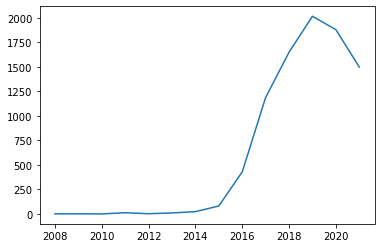

In [45]:
sns.lineplot(x=yearly_adds.index,y=yearly_adds.values)

In [37]:
dir_list = df['director'].apply(lambda x : str(x).split(', ')).tolist()

In [38]:
df_dir = pd.DataFrame(dir_list,index=df['title'])

In [39]:
df_dir.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None


In [40]:
df_dir.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None
Zoom,Peter Hewitt,None,None,None,None,None,None,None,None,None,None,None,None
Zubaan,Mozez Singh,None,None,None,None,None,None,None,None,None,None,None,None


In [70]:
df_dir = df_dir.stack()

In [71]:
df_dir = pd.DataFrame(df_dir)
df_dir.reset_index(inplace=True)

In [74]:
df_dir=df_dir[['title', 0]]

In [76]:
df_dir.columns = ['title', 'director']

In [99]:
df_dir['director'].value_counts()

nan               2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

In [85]:
def stacking(df,col):
    col_list = df[col].apply(lambda x : str(x).split(', ')).tolist()
    df_col = pd.DataFrame(col_list,index=df['title'])
    df_col = df_col.stack()
    df_col = pd.DataFrame(df_col)
    df_col.reset_index(inplace=True)
    df_col=df_col[['title', 0]]
    df_col.columns = ['title', col]
    return df_col

In [92]:
df_dir = stacking(df,'director')
df_cast = stacking(df,'cast')
df_country = stacking(df,'country')
df_listed = stacking(df,'listed_in')

In [110]:
df_final = df_dir.merge(df_cast,on='title')
df_final = df_final.merge(df_country,on='title')
df_final = df_final.merge(df_listed,on='title')

In [126]:
df_final.drop_duplicates(inplace=True)

In [129]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [132]:
df_merge = df_final.merge(df[['show_id', 'type', 'title','date_added','release_year',
                  'rating', 'duration','description','year_added']],
              on='title')

In [145]:
df_a = df_merge.loc[df_merge['year_added'].isna()][['title','listed_in']]

In [146]:
df_a.groupby(['listed_in'])['title'].nunique()

listed_in
Anime Series                 1
British TV Shows             1
Classic & Cult TV            2
Crime TV Shows               1
Docuseries                   1
International TV Shows       1
Kids' TV                     2
Spanish-Language TV Shows    1
TV Action & Adventure        1
TV Comedies                  7
TV Dramas                    1
TV Sci-Fi & Fantasy          1
Name: title, dtype: int64

In [156]:
df['date_released'] =  pd.to_datetime(df['release_year'],format='%Y')

In [158]:
df.loc[df['date_added'].isna(),'date_added'] = df.loc[df['date_added'].isna(),'date_released']

Series([], Name: date_added, dtype: datetime64[ns])

In [163]:
df['year_added'].isna().sum()

0

In [178]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,date_released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2020-01-01
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2021-01-01
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,2021-01-01
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,2021-01-01
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2021-01-01


In [166]:
eachyr_df = df.groupby(['type','year_added'])['show_id'].count().reset_index()

In [167]:
eachyr_df.head()

,type,year_added,show_id
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3


(2012.0, 2021.9)

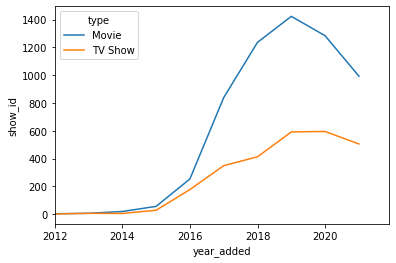

In [171]:
sns.lineplot(data=eachyr_df,x='year_added',y='show_id',hue='type')
plt.xlim([2012, None])

(0.0, 30.0)

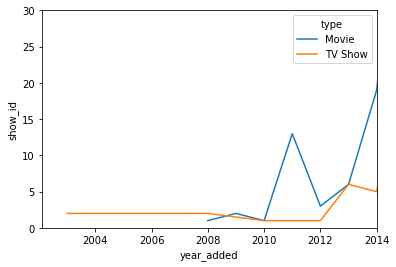

In [177]:
sns.lineplot(data=eachyr_df,x='year_added',y='show_id',hue='type')
plt.xlim([None, 2014])
plt.ylim([0,30])

In [181]:
eachyr_df[eachyr_df['type']!='TV Show']

,type,year_added,show_id
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,56
8,Movie,2016,253
9,Movie,2017,839


In [185]:
eachgen_df = df_merge.groupby(['listed_in','year_added']).agg({'title':'count'}).reset_index()

<AxesSubplot:xlabel='year_added', ylabel='title'>

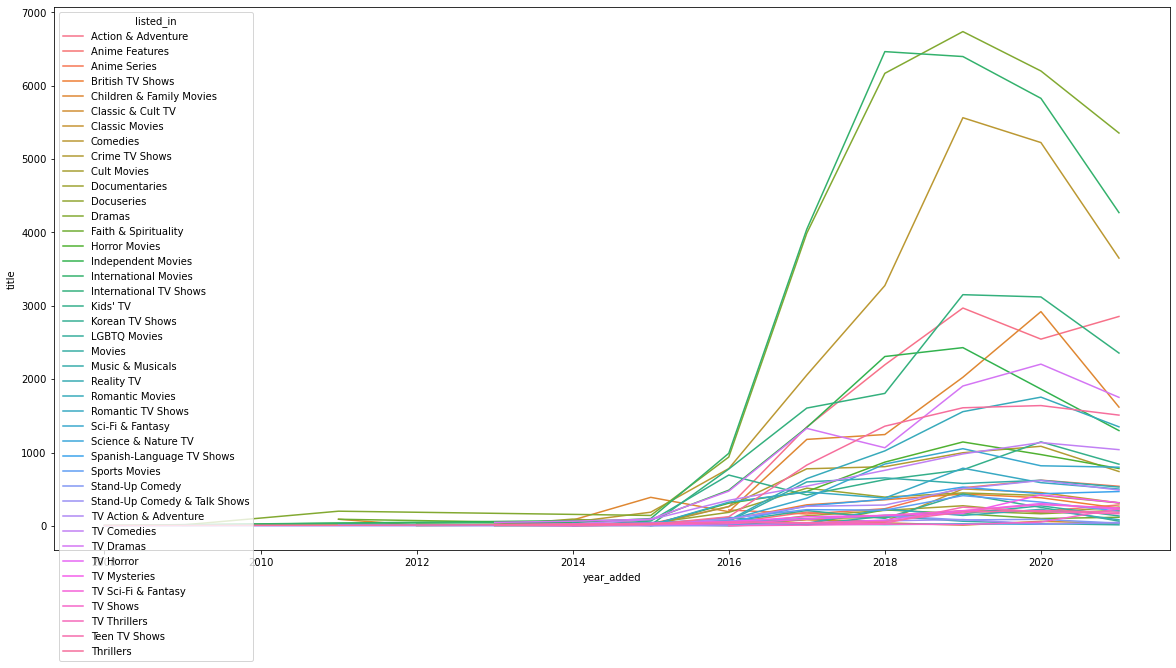

In [191]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=eachgen_df,x='year_added',y='title',hue='listed_in')
# plt.xlim([2012, None])

In [192]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,date_released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2020-01-01


In [202]:
temp_df = df.groupby(['rating'])['title'].count().reset_index()

In [209]:
rat_vals = temp_df.loc[temp_df['title']>10,'rating'].values

In [216]:
rat_cols = temp_df.loc[temp_df['title']>10].sort_values('title',ascending=False).rating

In [195]:
eachyrrat_df = df.groupby(['rating','year_added'])['title'].count().reset_index()

<AxesSubplot:xlabel='year_added', ylabel='title'>

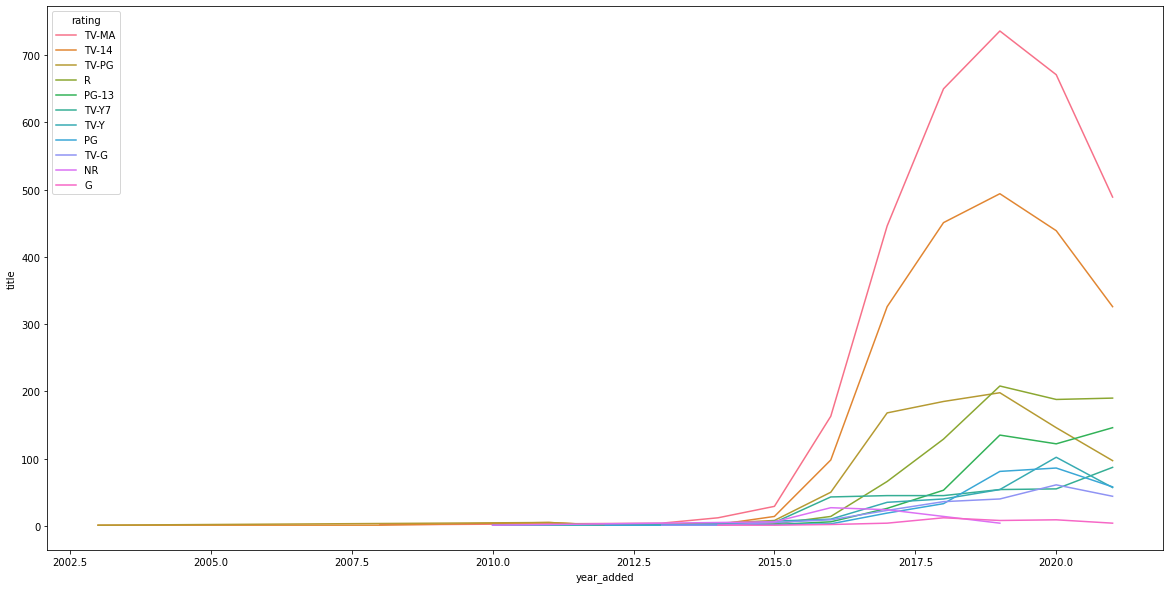

In [217]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=eachyrrat_df[eachyrrat_df['rating'].isin(rat_vals)],x='year_added',y='title',hue='rating',
            hue_order=rat_cols)
# plt.xlim([2012, None])

In [220]:
df_merge.groupby(['country','listed_in'])['title'].nunique().reset_index()

,country,listed_in,title
0,,Dramas,1
1,,Independent Movies,1
2,,International Movies,1
3,,International TV Shows,1
4,,TV Dramas,1
...,...,...,...
1459,nan,TV Sci-Fi & Fantasy,5
1460,nan,TV Shows,7
1461,nan,TV Thrillers,4
1462,nan,Teen TV Shows,3


In [221]:
df_merge['country'].value_counts()

United States     59324
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [223]:
df_merge['cast'].value_counts()

nan               2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Wendy McColm         1
Name: cast, Length: 36440, dtype: int64

In [225]:
df[df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,date_released
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,2021-01-01
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,2021-01-01
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,2021-01-01
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,2021-01-01
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",2021,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,2019-08-09,2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...,2019,2019-01-01
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,2019-02-01,2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...,2019,2015-01-01
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018,2016-01-01
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018,2016-01-01


In [240]:
dir_cnt = df_merge[['director','country']].drop_duplicates().replace('nan',np.nan).dropna()

In [241]:
dir_cnt

,director,country
0,Kirsten Johnson,United States
179,Haile Gerima,United States
182,Haile Gerima,Ghana
185,Haile Gerima,Burkina Faso
188,Haile Gerima,United Kingdom
...,...,...
201738,Chandra Prakash Dwivedi,India
201811,Majid Al Ansari,United Arab Emirates
201814,Majid Al Ansari,Jordan
201894,Peter Hewitt,United States


In [243]:
df_merge[df_merge['director']=='Haile Gerima']['country'].value_counts()

United States     24
Ghana             24
Burkina Faso      24
United Kingdom    24
Germany           24
Ethiopia          24
Name: country, dtype: int64

In [244]:
df[df['director']=='Haile Gerima']['country'].value_counts()

United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia    1
Name: country, dtype: int64

In [248]:
df_country['title'].value_counts()[:30]

Barbecue                                      12
The Look of Silence                           10
The Professor and the Madman                   8
Shaun the Sheep                                8
Domino                                         7
The Congress                                   7
The Breadwinner                                7
Arctic Dogs                                    7
The Take                                       7
Wadjda                                         6
Stop at Nothing: The Lance Armstrong Story     6
The Making of Frozen Planet                    6
Frozen Planet: The Epic Journey                6
Frozen Planet: On Thin Ice                     6
Frozen Planet                                  6
The Command                                    6
Sankofa                                        6
A Sort of Family                               6
Another Forever                                6
Beyond Skyline                                 6
Ultimate Beastmaster

In [250]:
(100.0*df.isna().sum()/df.shape[0]).round(2)

show_id           0.00
type              0.00
title             0.00
director         29.91
cast              9.37
country           9.44
date_added        0.00
release_year      0.00
rating            0.05
duration          0.03
listed_in         0.00
description       0.00
year_added        0.00
date_released     0.00
dtype: float64

In [254]:
df_ = df.loc[df['country'].isna()]
(100.0*df_.isna().sum()/df_.shape[0]).round(2)

show_id            0.00
type               0.00
title              0.00
director          49.22
cast              18.53
country          100.00
date_added         0.00
release_year       0.00
rating             0.12
duration           0.00
listed_in          0.00
description        0.00
year_added         0.00
date_released      0.00
dtype: float64

In [253]:
(100.0*df_.isna().sum()/df_.shape[0]).round(2)

show_id            0.00
type               0.00
title              0.00
director          49.22
cast              18.53
country          100.00
date_added         0.00
release_year       0.00
rating             0.12
duration           0.00
listed_in          0.00
description        0.00
year_added         0.00
date_released      0.00
dtype: float64

In [261]:
df_t = df_merge[['director','country','title']].drop_duplicates().replace('nan',np.nan).dropna()

In [264]:
df_t1 = df_t.groupby(['director','country']).count().reset_index()

In [298]:
def samp_fun(sub_df):
    argmx = sub_df['title'].argmax()
    return sub_df.iloc[argmx,1]

In [300]:
dir_cnt = df_t1.groupby(['director']).apply(samp_fun)

In [301]:
dir_cnt

director
A. L. Vijay              India
A. Raajdheep             India
A. Salaam                India
A.R. Murugadoss          India
Aadish Keluskar          India
                        ...   
Éric Warin              Canada
Ísold Uggadóttir       Belgium
Óskar Thór Axelsson    Iceland
Ömer Faruk Sorak        Turkey
Şenol Sönmez            Turkey
Length: 4739, dtype: object

In [305]:
df_t = df_merge[['cast','country','title']].drop_duplicates().replace('nan',np.nan).dropna()

In [306]:
df_t1 = df_t.groupby(['cast','country']).count().reset_index()

In [307]:
cast_cnt = df_t1.groupby(['cast']).apply(samp_fun)

In [308]:
cast_cnt

cast
 Jr.                      United States
"Riley" Lakdhar Dridi            France
'Najite Dede                    Nigeria
2 Chainz                  United States
2Mex                      United States
                              ...      
Şevket Çoruh                     Turkey
Şinasi Yurtsever                 Turkey
Şükran Ovalı                     Turkey
Şükrü Özyıldız                   Turkey
Ṣọpẹ́ Dìrísù             United Kingdom
Length: 34321, dtype: object

In [303]:
dir_cnt['A.R. Murugadoss']

'India'

In [315]:
def replace_dir_cnt(row):
    if row['country']=='nan':
        if row['director']!='nan' and row['director'] in dir_cnt:
            return dir_cnt[row['director']]
        elif row['cast']!='nan' and row['cast'] in cast_cnt:
            return cast_cnt[row['cast']]
        else:
            return row['country']
        
    else:
        return row['country']

In [347]:
df_merge['country_imput'] = df_merge.apply(replace_dir_cnt,axis=1)

In [345]:
df_t2

0         United States
1          South Africa
2          South Africa
3          South Africa
4          South Africa
              ...      
201931            India
201932            India
201933            India
201934            India
201935            India
Length: 201936, dtype: object

In [346]:
df_merge['country']

0         United States
1          South Africa
2          South Africa
3          South Africa
4          South Africa
              ...      
201931            India
201932            India
201933            India
201934            India
201935            India
Name: country, Length: 201936, dtype: object

In [350]:
df_merge[df_merge['type']=='TV Show']['listed_in'].value_counts()

International TV Shows          12845
TV Dramas                        8942
TV Comedies                      4963
Crime TV Shows                   4733
Kids' TV                         4568
Romantic TV Shows                3049
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
TV Mysteries                     1281
Korean TV Shows                  1122
TV Sci-Fi & Fantasy              1045
TV Horror                         941
Docuseries                        845
TV Thrillers                      768
Teen TV Shows                     742
Reality TV                        735
TV Shows                          337
Classic & Cult TV                 272
Stand-Up Comedy & Talk Shows      268
Science & Nature TV               157
Name: listed_in, dtype: int64

In [364]:
df_t4 = df_merge.groupby(['country','listed_in'])['title'].nunique().reset_index()

In [359]:
df_merge['country'].replace('','nan',inplace=True)

In [363]:
df_merge.groupby(['country'])['title'].nunique().reset_index().sort_values('title',ascending=False).head(10)

,country,title
118,United States,3689
46,India,1046
126,nan,833
116,United Kingdom,804
21,Canada,445
37,France,393
54,Japan,318
104,Spain,232
102,South Korea,231
39,Germany,226


In [372]:
df_t4[df_t4['country']=='United States'].sort_values('title',ascending=False).tail(10)

,country,listed_in,title
1365,United States,Stand-Up Comedy & Talk Shows,33
1362,United States,Spanish-Language TV Shows,29
1373,United States,TV Thrillers,27
1337,United States,British TV Shows,24
1355,United States,Movies,22
1336,United States,Anime Series,18
1339,United States,Classic & Cult TV,17
1335,United States,Anime Features,7
1372,United States,TV Shows,4
1353,United States,Korean TV Shows,3


In [373]:
df_t4[df_t4['country']=='India'].sort_values('title',ascending=False).tail(10)

,country,listed_in,title
514,India,Cult Movies,5
518,India,Faith & Spirituality,4
509,India,British TV Shows,3
532,India,Stand-Up Comedy & Talk Shows,3
538,India,TV Sci-Fi & Fantasy,3
539,India,TV Shows,3
540,India,TV Thrillers,3
524,India,LGBTQ Movies,2
537,India,TV Mysteries,2
541,India,Teen TV Shows,1
